In [1]:
# Material last updated: 15 Oct 2022
# Note materials were designed with the Roboto Condensed font, which can be installed here: https://www.1001fonts.com/roboto-condensed-font.html

from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{ 
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
    <script> code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script>
    <form action="javascript:code_toggle()"><input type="submit" value="Hide/show all code."></form>
''')

# Emily Progress Notebook


## Purpose
To get a greater understanding on what impacts the step activity for participant 1 by exploring the driving question of "What are the trends across the week" along with the sub questions of "Does the week day step patterns differ month to month?" and "Does weather conditions such as rainfall and amount of sun impact the number of steps made in a week?"


## Methodology
Quickly describe assumptions and processing steps.

First before looking the general distribution of the data by making a boxplot and seeing what was the maximum and minimum steps for a day.

Then looking at step count for the days of the week by using a bar chart to compare. My assumption for trends during the week is that generally the weekdays will have a higher step count as people have work or school during the weekdays making them more likely to travel more thus taking more steps.

To see if participant 1's step activity for the week differ by month, create a line chart to compare the months and a heat chart see visual density easier. My assumption for this sub question was that while Professor Judy did not state the participants were students of University of Sydney(Usyd), however I assumed that they would have some correlation with Usyd in order to be approached for donating their data, therefore I would assume that the months February to June have a higher step counts during the weekdays.

To see if participant 1's step activity for impacted by weather conditions such as rainfall or the amount of sunlight, correlation is checked. Assumptions for this step was that they were present in sydney for some time so they weather data used is collected from the Sydney station or the nearest observatory station to Usyd, my assumption for this step would be if it rains the participant would try to make less steps and the participant would be more likely to make more steps on a day with more sunlight.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- Make graph for weekday vs weekend months maybe
- high and low cutoff for graphs
- Reduce number of code blocks by having multiple prints per block
- More evenly distribute markdown blocks to explain code blocks
- Make conclusions after discussing with other tm. notebooks
- Reference code

## Results

We found for participant 1 that the day that they made the most steps was on Sunday and the day they made the least steps was on Sunday. They make more steps on Wednesdays and for other days of the week they make fairly similar steps.

Looking at the days of the week step activity by month, Participant 1's weekly step patterns were not consistent each month and slight show a increase in step count for weekdays during the usyd semester.

There was little to none correlation between rainfall and step activity for participant 1 and slight correlation between level of sunlight with step activity.

## Suggested next steps
Compare with other notebooks


# Setup

## Library import
We imported all the required Python libraries


In [2]:


# Data manipulation
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from pathlib import Path

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt


## Data import
We retrieve all the required data for the analysis

Datasets for:
* Participant 1
* Participant 2
* Participant 5
* Rainfall
* Sun exposure

In [3]:
# Include data paths
dataset_path = Path('../../../datasets')
add_dataset_path = Path('../../../datasets/additional')
# Import datasets
raw_data_p1 = pd.read_csv(dataset_path / 'Participant-01.csv')
p1 = raw_data_p1.copy()

raw_data_p2 = pd.read_csv(dataset_path / 'Participant-02-detail.csv')
p2 = raw_data_p2.copy()

raw_data_p5 = pd.read_csv(dataset_path / 'Participant-05-detail.csv')
p5 = raw_data_p5.copy()

# for climate datasets the year month day are separated i need them to be together therefore i parsed them together
raw_data = pd.read_csv(add_dataset_path / 'rainfall_syd.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sydrain = raw_data.copy()

raw_data2 = pd.read_csv(add_dataset_path / 'solar_cent_park.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sun = raw_data2.copy()

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

| Variable Name      | Description |Datatype |
| ----------- | ----------- |----------- |
| Start      | Time that step count was detected       |       Datetime     |
| Finish  | Time that step count detected stopped      |       Datetime     |
| Week Day | Day of the week data is collected from     |       String     |
| Month  | Month data is collected from      |       String    |
| Date  | Date the data is collected from      |       Datetime     |
| Steps (count) /  Count | Number of steps       |     Int      |
| Daily global solar exposure (MJ/m*m) | Global solar exposure is the total amount of solar energy falling on a horizontal surface of unit area over a given time.    |      Float      |
| Rainfall amount (millimetres)| The amount of rainfall measured for a day      |    Float       |

# IDA

First that a look at the datatype of the data

In [4]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          5867 non-null   object 
 1   Finish         5867 non-null   object 
 2   Steps (count)  5867 non-null   float64
dtypes: float64(1), object(2)
memory usage: 137.6+ KB


In [5]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31638 entries, 0 to 31637
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  31638 non-null  object
 1   Date    31638 non-null  object
 2   Hour    31638 non-null  int64 
 3   Count   31638 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 988.8+ KB


In [6]:
p5.info

<bound method DataFrame.info of         Source        Date  Hour  Count
0      person5  2022-01-27     8      4
1      person5  2022-01-02    13     78
2      person5  2022-01-02    12     66
3      person5  2022-01-02    12     57
4      person5  2022-01-02    12     99
...        ...         ...   ...    ...
12132  person5  2022-09-01    19     59
12133  person5  2022-09-01    19    102
12134  person5  2022-09-01    19     15
12135  person5  2022-09-01    21     35
12136  person5  2022-09-01    21     47

[12137 rows x 4 columns]>

Now check if there is any missing or duplicate data, if there is duplicate data drop it.

In [7]:
# check if missing values in data
p1.isnull().sum()

Start            0
Finish           0
Steps (count)    0
dtype: int64

In [8]:
# check if missing values in data
p2.isnull().sum()

Source    0
Date      0
Hour      0
Count     0
dtype: int64

In [9]:
# check if missing values in data
p5.isnull().sum()

Source    0
Date      0
Hour      0
Count     0
dtype: int64

In [41]:
sun.isnull().sum()

Date                                    0
Product code                            0
Bureau of Meteorology station number    0
Daily global solar exposure (MJ/m*m)    0
Month                                   0
Week Day                                0
dtype: int64

In [43]:
sydrain.isnull().sum()

Date                                              0
Product code                                      0
Bureau of Meteorology station number              0
Rainfall amount (millimetres)                     3
Period over which rainfall was measured (days)    3
Quality                                           3
Month                                             0
Week Day                                          0
dtype: int64

In [10]:
# check for duplicate values
p1[p1.duplicated()]

,Start,Finish,Steps (count)


In [11]:
# check for duplicate values
p2[p2.duplicated()]

,Source,Date,Hour,Count
16,P2’s Apple Watch,2022-01-01,6,15
43,P2’s Apple Watch,2022-01-01,11,26
132,P2’s Apple Watch,2022-01-02,10,154
134,P2’s Apple Watch,2022-01-02,10,150
135,P2’s Apple Watch,2022-01-02,10,151
...,...,...,...,...
31540,P2’s Apple Watch,2022-09-01,7,8
31555,P2’s Apple Watch,2022-09-01,9,33
31569,P2’s Apple Watch,2022-09-01,13,16
31572,P2’s Apple Watch,2022-09-01,14,4


In [12]:
# check for duplicate values
p5[p5.duplicated()]

,Source,Date,Hour,Count
7,person5,2022-01-02,11,101
194,person5,2022-01-06,11,69
266,person5,2022-01-10,23,54
273,person5,2022-02-02,2,46
393,person5,2022-02-05,9,50
...,...,...,...,...
10516,person5,2022-07-24,21,16
10868,person5,2022-08-02,18,92
11299,person5,2022-08-14,18,199
11631,person5,2022-08-22,15,8


In [44]:
# check for duplicate values
sun[sun.duplicated()]

,Date,Product code,Bureau of Meteorology station number,Daily global solar exposure (MJ/m*m),Month,Week Day


In [45]:
# check for duplicate values
sydrain[sydrain.duplicated()]

,Date,Product code,Bureau of Meteorology station number,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,Month,Week Day


In [13]:
# will now drop the duplicates
p2.drop_duplicates(keep=False, inplace=True)
p5.drop_duplicates(keep=False, inplace=True)

# Data processing
First clean the datasets 

In [14]:
# i want to create a function that subs in the dataset for the following operations so I don't have to repeat these steps
def sub(data):
#     convert start,finish columns to datetime formats
    data['Start'] = pd.to_datetime(data['Start'])
    data['Finish'] = pd.to_datetime(data['Finish'])
#     extract the weekday name, month names and date in YYYY-MM-DD format from start column
    data['Week Day'] = data['Start'].dt.day_name()
    data['Month'] = data['Start'].dt.month_name()
    data['Year'] = data['Start'].dt.year
    data['Date'] = data['Start'].dt.date
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     week days are ordered so that it's matches the order that day of the week are.
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['Week Day'] = data['Week Day'].astype(cat_type)
# I want to drop the months of december and september as they have less than 1 week of recorded data so not very useful
#     data.drop(data[data['Month'] == 'December'].index, inplace = True)
#     data.drop(data[data['Month'] == 'September'].index, inplace = True)
#     data.drop(data[data['Year'] != 2022].index, inplace = True)
    
# function for detail data
def subdetail(data):
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     extract week day and month from date
    data['Week Day'] = data['Date'].dt.day_name()
    data['Month'] = data['Date'].dt.month_name()
    data['Year'] = data['Date'].dt.year
#     order week days
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['Week Day'] = data['Week Day'].astype(cat_type)
#     remove december and september as they don't have enough days for days of the week analysis
#     data.drop(data[data['Month'] == 'December'].index, inplace = True)
#     data.drop(data[data['Month'] == 'September'].index, inplace = True)
#     data.drop(data[data['Year'] != 2022].index, inplace = True)

    
# function for weather dataset
def subw(data):
#     extract week day and month from date
    data['Month'] = data['Date'].dt.month_name()
    data['Week Day'] = data['Date'].dt.day_name()
#     order week days
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['Week Day'] = data['Week Day'].astype(cat_type)

In [15]:
# now sub the datasets into the functions
sub(p1)
subdetail(p2)
subdetail(p5)
subw(sydrain)
subw(sun)

# change count name so it matches format of non-detail datasets
p2 = p2.rename(columns={'Count': 'Steps (count)'})
p5 = p5.rename(columns={'Count': 'Steps (count)'})

# Data Exploration



In [16]:
# first group the data by dates
day = p1.groupby(['Date'], as_index=False).agg({'Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day2 = p2.groupby(['Date'], as_index=False).agg({'Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day5 = p5.groupby(['Date'], as_index=False).agg({'Steps (count)': 'sum','Week Day': 'first','Month': 'first'})

In [17]:
# function that displays results tables side by side for easy comparison from reference 1
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
# first look at the general trends of the data
display_side_by_side(day.describe(),day2.describe(),day5.describe())
# to do: reference this 

,Steps (count)
count,246.000000
mean,8571.745569
std,4051.592687
min,0.000000
25%,5913.250000
50%,7948.000000
75%,10388.750000
max,25660.398309
,Steps (count)
count,246.000000


In [18]:
# check the max and min step for participant 1
day.max(),day.min()

(Date             2022-09-02 00:00:00
 Steps (count)           25660.398309
 Week Day                      Sunday
 Month                      September
 dtype: object,
 Date             2021-12-31 00:00:00
 Steps (count)                    0.0
 Week Day                      Monday
 Month                          April
 dtype: object)

In [19]:
# check the max and min step for participant 2
day2.max(),day2.min()

(Date             2022-09-01 00:00:00
 Steps (count)                  43721
 Week Day                      Sunday
 Month                      September
 dtype: object,
 Date             2021-10-08 00:00:00
 Steps (count)                     36
 Week Day                      Monday
 Month                          April
 dtype: object)

In [20]:
# check the max and min step for participant 5
day5.max(),day5.min()

(Date             2022-09-01 00:00:00
 Steps (count)                  46523
 Week Day                      Sunday
 Month                      September
 dtype: object,
 Date             2022-01-01 00:00:00
 Steps (count)                      4
 Week Day                      Monday
 Month                          April
 dtype: object)

In [21]:
# from the table above, the count of p3 was visibly lower than other datasets, i wanted to see which dates were missing
pd.date_range('2022-01-01', '2022-08-31').difference(day5['Date'])

DatetimeIndex(['2022-01-08', '2022-01-09', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq=None)

From looking at the result above it could be seen that the data for participant 1 and 2 has no missing days as from January to August there is 242 days, therefore they have the correct count of days + header row of 243, however for participant 5 it does indicate that there are missing dates in the data where there are 22 days missing from the month of January, this could be a problem of adherance.

For participant 1, the most steps taken in a day was 25660 step on a Sunday and the least steps taken in a day was 723 steps on a Monday. We can see that they average 8611 steps per day.

For participant 2, the most step taken was 45299 on a Sunday and the least steps of 1424 on a Monday. They averaged 13619 steps per day. For participant 5, the most steps taken was 46647 on a Sunday and the least steps of 4 on a Monday. Participant 5 averaged 9394 steps per day.

We can see that the maximum amount of step for all three participants was made on a Sunday, this may be due to people liking to plan social activities such as hikes or a walk around the city with friends or family on the weekends especially Sunday where trains are cheaper and more people are free from work/university. It could also be seen the the lowest amount of steps made was on monday for all participants, this may be due to cases of monday blues.

### Now visualising the number of steps made for each day of the week

Assumption for this was that the weekdays will show a higher average step count.

Text(0.5, 1.0, 'P5: Average daily steps by weekday')

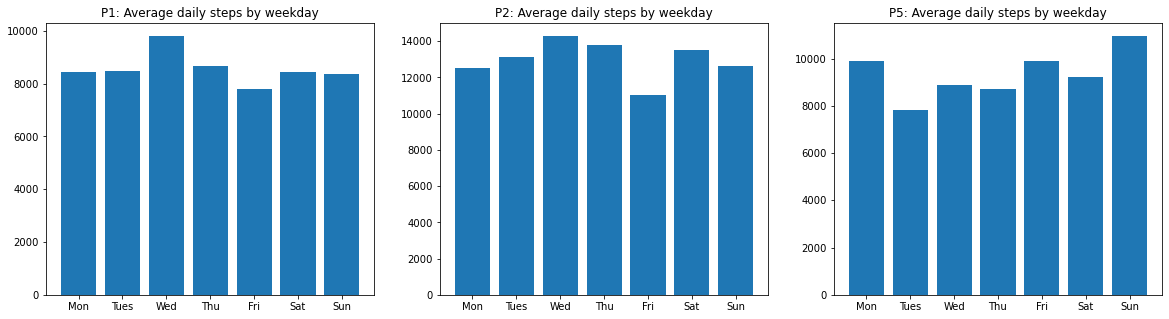

In [22]:
# group by Week Day and get average step count
week_avg = day.groupby(['Week Day'])['Steps (count)'].mean()
week_avg2 = day2.groupby(['Week Day'])['Steps (count)'].mean()
week_avg3 = day5.groupby(['Week Day'])['Steps (count)'].mean()

# plot three datasets
cats = [ 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.rcParams["figure.figsize"] = (20,5)

fig, axs = plt.subplots(1, 3)
axs[0].bar(cats, week_avg)
axs[0].set_title('P1: Average daily steps by weekday')

axs[1].bar(cats, week_avg2)
axs[1].set_title('P2: Average daily steps by weekday')

axs[2].bar(cats, week_avg3)
axs[2].set_title('P5: Average daily steps by weekday')

From looking at the chart we can see that for participant 1 besides Wednesday which has the highest average daily step of close to 10000 steps, the other days of the week are pretty consistent being around 8000 steps.

Looking at participant 2, we can see that Wednesday is also the day of the week that has the highest daily average having nearly 15000 steps and Friday being the lowest daily average with around 12000 steps and all the other days of the week containing around 13000 steps.

Participant 5, has the highest daily step count on Sundays, with over 11000 steps, and least steps on Tuesdays with 7800 steps. Monday and Friday have almost 10000 average daily steps, while Wednesday, Thursday and Saturday are around 9000 steps.

Looking at all three participants, there is no apparent trend across the week that is common for all. This may be due to indivuals having different weekly schedules.

### Weekday vs Weekend step patterns

[Text(0.5, 1.0, 'Participant 1 weekday vs weekend step trend')]

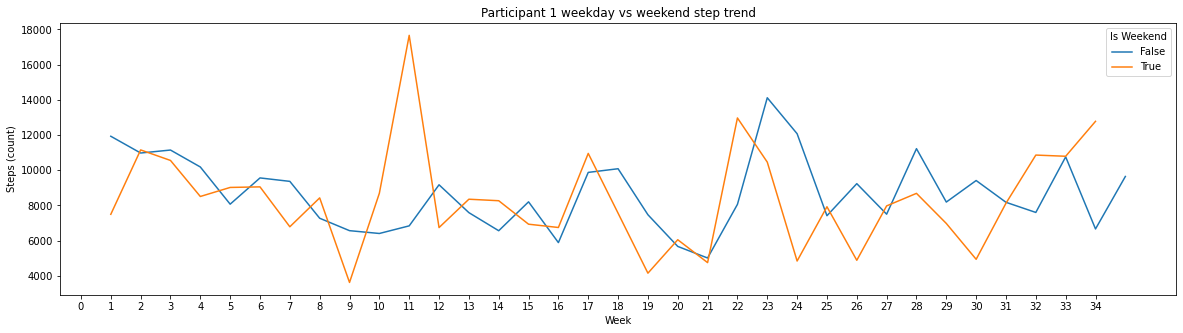

In [23]:
# i wanted to make a graph that visualises weekday vs weekend for each week in the data
# weeks = [g for n, g in day.groupby(pd.Grouper(key='Date',freq='W'))]
# first sort the dates into what weeks they are in the year
day['Week'] =  day['Date'].dt.isocalendar().week
day2['Week'] =  day['Date'].dt.isocalendar().week
day5['Week'] =  day['Date'].dt.isocalendar().week
# I wanted to drop the week 52 which is from 2021 and not 2022 but first made a copy so the data is not lost
newday = day.copy()
newday.drop(newday[newday['Week'] == 52].index, inplace = True)
newday2 = day2.copy()
newday2.drop(newday2[newday2['Week'] == 52].index, inplace = True)
newday3 = day5.copy()
newday3.drop(newday3[newday3['Week'] == 52].index, inplace = True)

# I then separed the dates as to whether they were part of weekday or weekend
# monday = day.loc[day['Week Day'] == 'Monday']
newday["Is Weekend"] = newday['Date'].dt.dayofweek > 4
newday2["Is Weekend"] = newday2['Date'].dt.dayofweek > 4
newday3["Is Weekend"] = newday3['Date'].dt.dayofweek > 4

# group data, then plot as a line graph 
df = newday.groupby(['Is Weekend','Week']).agg({'Steps (count)': 'mean'}).reset_index()
g = sns.lineplot(data=df, x="Week", y="Steps (count)", hue="Is Weekend")
# make the x ticks show all values instead of being spaced out by 5 which was the default setting
g.set_xticks(range(35))
g.set(title='Participant 1 weekday vs weekend step trend')

[Text(0.5, 1.0, 'Participant 2 weekday vs weekend step trend')]

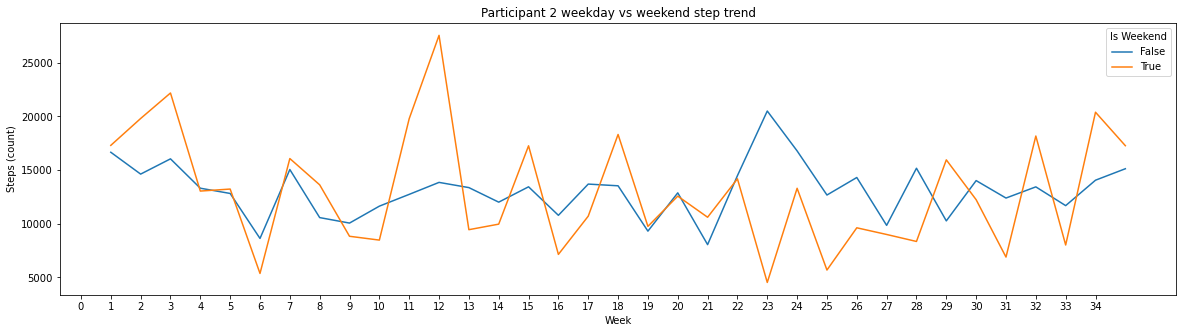

In [24]:
# repeated this for participant 2
df2 = newday2.groupby(['Is Weekend','Week']).agg({'Steps (count)': 'mean'}).reset_index()
g= sns.lineplot(data=df2, x="Week", y="Steps (count)", hue="Is Weekend")
g.set_xticks(range(35))
g.set(title='Participant 2 weekday vs weekend step trend')

[Text(0.5, 1.0, 'Participant 3 weekday vs weekend step trend')]

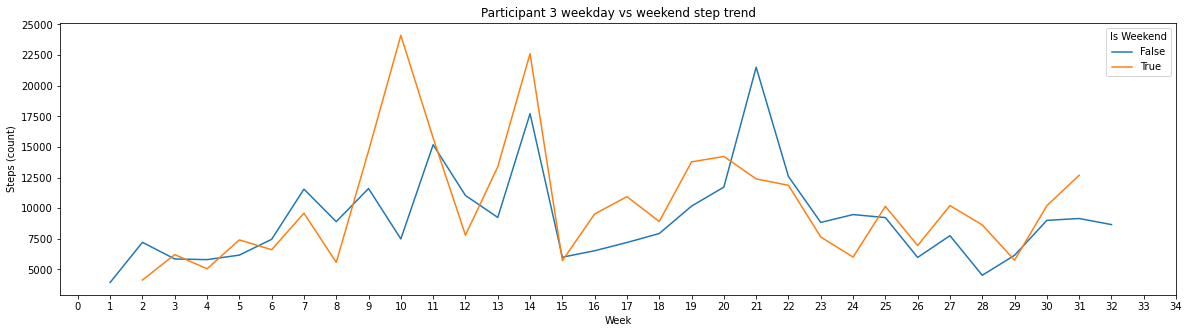

In [25]:
# again for participant 5
df3 = newday3.groupby(['Is Weekend','Week']).agg({'Steps (count)': 'mean'}).reset_index()
g= sns.lineplot(data=df3, x="Week", y="Steps (count)", hue="Is Weekend")
g.set_xticks(range(35))
g.set(title='Participant 3 weekday vs weekend step trend')

In [26]:
# aggregate summary of the mean step counts for weekend vs weekday, side by side using the function made before
x = newday.groupby(['Is Weekend']).agg({'Steps (count)': 'mean'})
y = newday2.groupby(['Is Weekend']).agg({'Steps (count)': 'mean'})
z= newday3.groupby(['Is Weekend']).agg({'Steps (count)': 'mean'})
display_side_by_side(x,y,z)


,Steps (count)
Is Weekend,
False,8682.319754
True,8342.609603
,Steps (count)
Is Weekend,
False,13073.603448
True,12932.869565
,Steps (count)
Is Weekend,
False,9056.207547


Looking at the line graph of participant 1 we can see for a number of weeks that the average number of steps made on the weekdays is higher than that of the weekends (week 1-8, 17-20, 23-31), and from looking at the average steps made weekday vs weekend where weekday has average of 8682 steps and weekend has 8342 step, the assumption for participant 1 would be true in this case. Something interesting to note, from week 10 to week 12 (march 12,13,19,20,26,27), there was a significant peak in the steps made during the weekends.

Looking at the graphs of participant 2,neither weekend or weekday seems to be the majority but both alternate.Looking at the table though we can see that it is a close average but the weekend average is slightly higher than that of weekdays.It is also to note there is a peak in wk 10 -13.

Participant 3's graph shows more peaks in the data and does appear that the weekend has a slightly higher average for majority of weeks. Looking at the table this is true where the weekend step average is higher by 1000 steps. It is to note that there was three peaks in this graph, weekend wk 9-12, wk13-15 and weekday wk 20-22.

looking at the three participants the assumption that weekdays will have a higher step count that weekends does not hold as it seems that the weekends have nearly the same to more step than the weekdays in these three cases.

## Sub Question: Does the week day step patterns differ month to month?

Assumption for this the months of February to June have higher step activity for the weekdays.

In [27]:
# order the months
cat2 = ['December','January','February','March','April','May','June','July','August','September']
cat2_type = CategoricalDtype(categories=cat2, ordered=True)
day['Month'] = day['Month'].astype(cat2_type)
day2['Month'] = day2['Month'].astype(cat2_type)
day5['Month'] = day5['Month'].astype(cat2_type)
# group by month and weekday and get mean step count for all 3 participants
week_month_count = day.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean','Date':'first'}).reset_index()
week_month_count2 = day2.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean','Date':'first'}).reset_index()
week_month_count3 = day5.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean','Date':'first'}).reset_index()

C:\Users\autum\AppData\Local\Temp/ipykernel_31272/1205605390.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


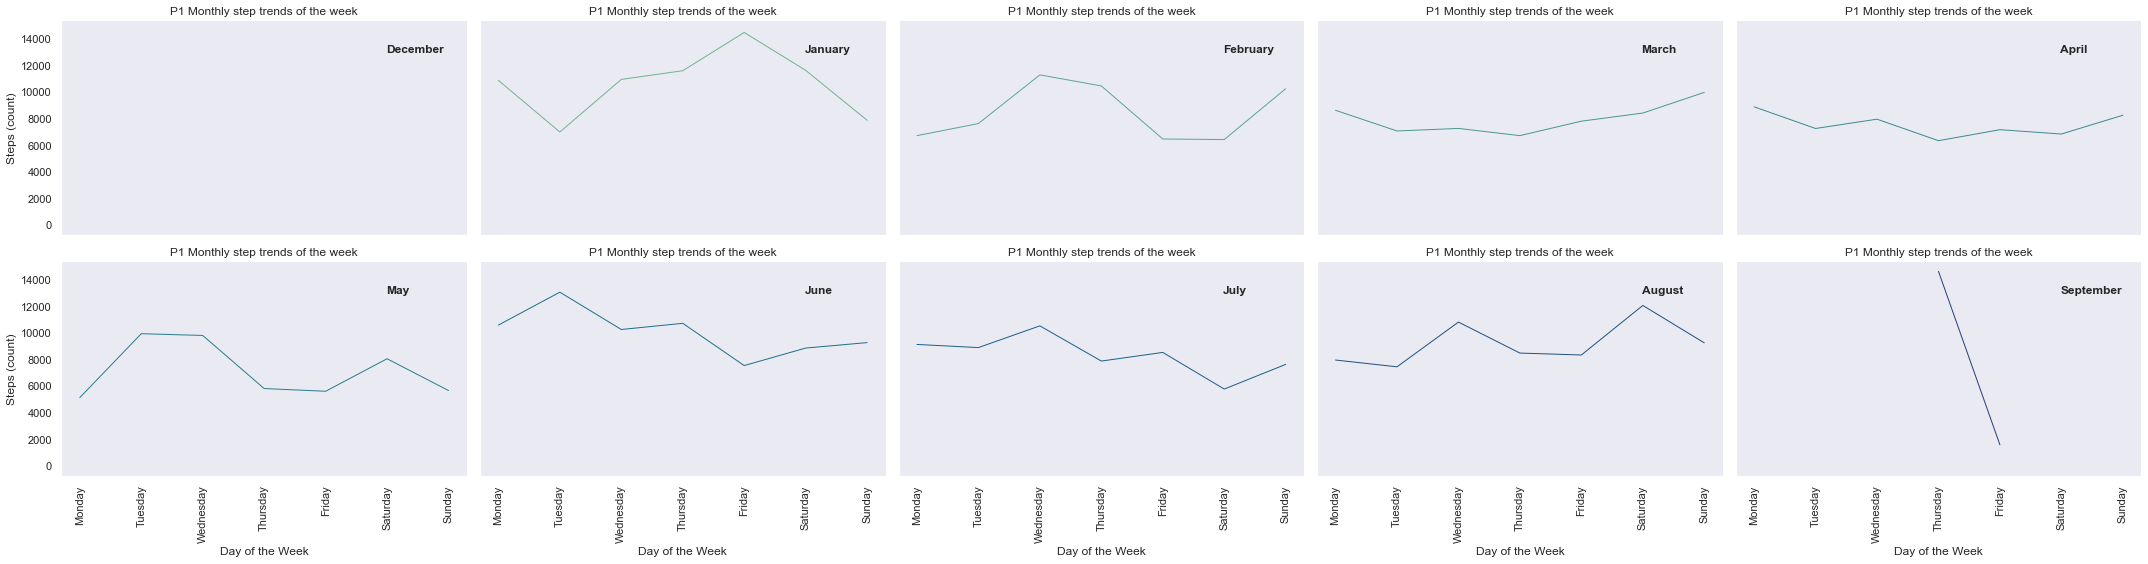

In [28]:
# reference 2
sns.set_theme(style="dark")

# Plot each months's step count for day of the week.
g = sns.relplot(
    data=week_month_count,
    x="Week Day", y="Steps (count)", col="Month", hue="Month",
    kind="line", palette="crest", linewidth=1, zorder=5,
    col_wrap=5, height=4, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for Month, ax in g.axes_dict.items():
    # Rotate the xticks by 90 degrees  
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    # Add the title for the months as an annotation within the plot
    ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")
    

# Tweak the supporting aspects of the plot
g.set_titles("P1 Monthly step trends of the week")
g.set_axis_labels("Day of the Week", "Steps (count)")
g.tight_layout()

For participant 1 we can see that the assumption slight apply as  the month of January, February, May, June show an obvious trend of higher step counts for week days in comparison to weekends, however the months of March weekends show an increase in step counts instead and April shows not that much difference in weekday and weekend step activity.

C:\Users\autum\AppData\Local\Temp/ipykernel_31272/1147523406.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


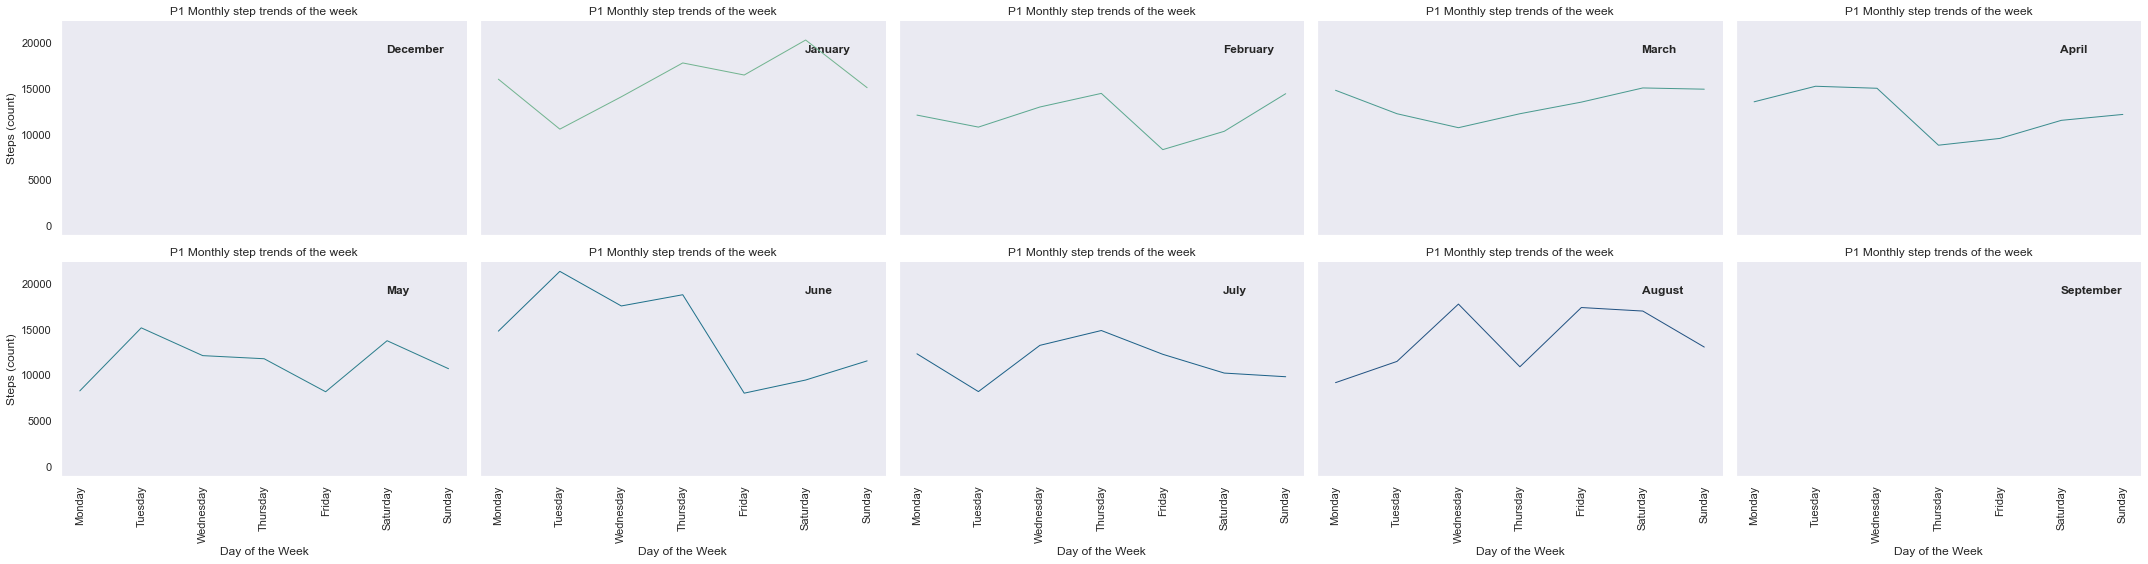

In [29]:
sns.set_theme(style="dark")

# Plot each months's step count for day of the week.
g = sns.relplot(
    data=week_month_count2,
    x="Week Day", y="Steps (count)", col="Month", hue="Month",
    kind="line", palette="crest", linewidth=1, zorder=5,
    col_wrap=5, height=4, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for Month, ax in g.axes_dict.items():
    # Rotate the xticks by 90 degrees  
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    # Add the title for the months as an annotation within the plot
    ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")
    

# Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("P1 Monthly step trends of the week")
g.set_axis_labels("Day of the Week", "Steps (count)")
g.tight_layout()

The assumption can not be applied in this case as besides the months of February, April , May, and June which show an increase in step count for the weekdays, the months of January, March show that step count increase towards the weekends.

C:\Users\autum\AppData\Local\Temp/ipykernel_31272/423416425.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


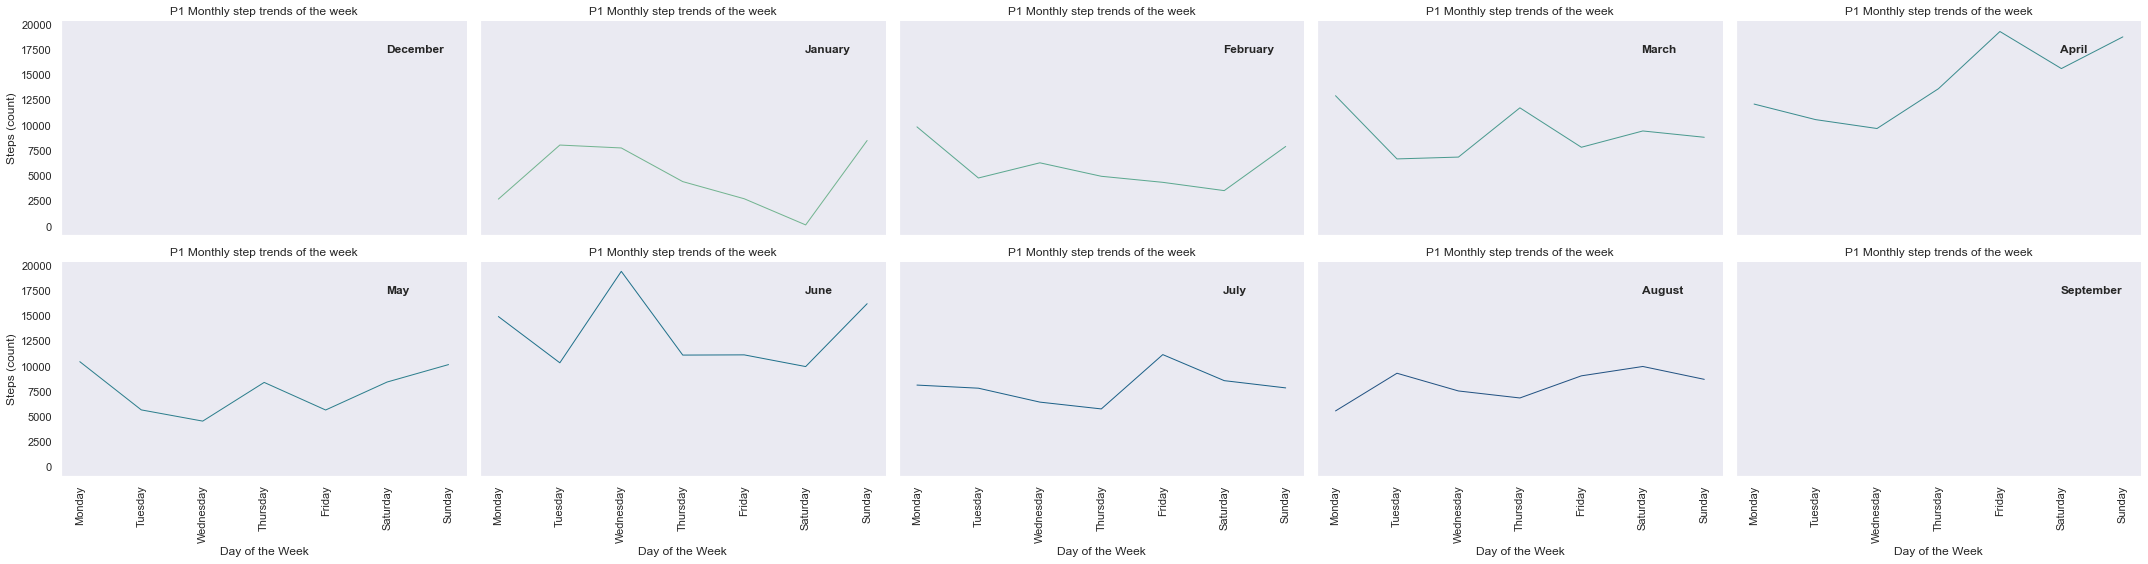

In [30]:
sns.set_theme(style="dark")

# Plot each months's step count for day of the week.
g = sns.relplot(
    data=week_month_count3,
    x="Week Day", y="Steps (count)", col="Month", hue="Month",
    kind="line", palette="crest", linewidth=1, zorder=5,
    col_wrap=5, height=4, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for Month, ax in g.axes_dict.items():
    # Rotate the xticks by 90 degrees  
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    # Add the title for the months as an annotation within the plot
    ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")
    

# Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("P1 Monthly step trends of the week")
g.set_axis_labels("Day of the Week", "Steps (count)")
g.tight_layout()

The assumption does not apply in this case as January, April, May shows step count increasing for the weekends and the other month doesn't show apparent trends.

Now taking a look a the heat maps

Text(0.5, 1.0, 'P1: Monthly Average Step Count for Days of the Week')

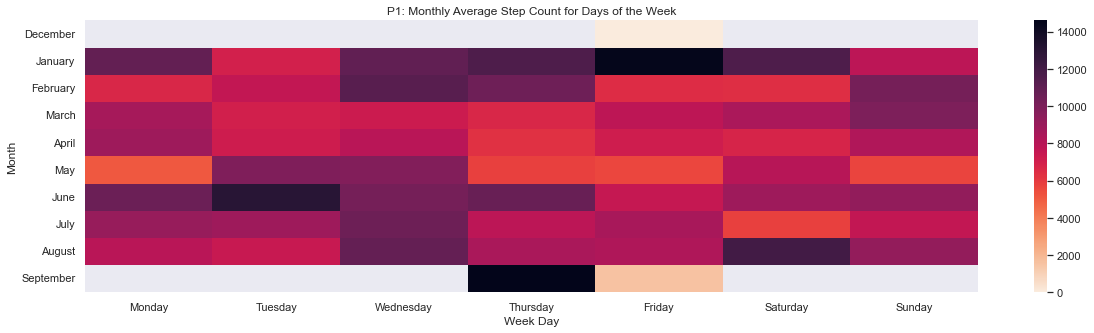

In [31]:
# first group the required data
hm = day.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
hm = hm.pivot("Month", "Week Day", "Steps (count)")
# now plot the data using seaborn
ax = sns.heatmap(hm,cmap='rocket_r')
ax.set_title('P1: Monthly Average Step Count for Days of the Week')

Particpant 1 heat map shows that assumption does not apply, as in the heat map we can see that the months July- August which is not semester dates actually have higher step counts on the weekdays than some months during the semester term.

Text(0.5, 1.0, 'P2: Monthly Average Step Count for Days of the Week')

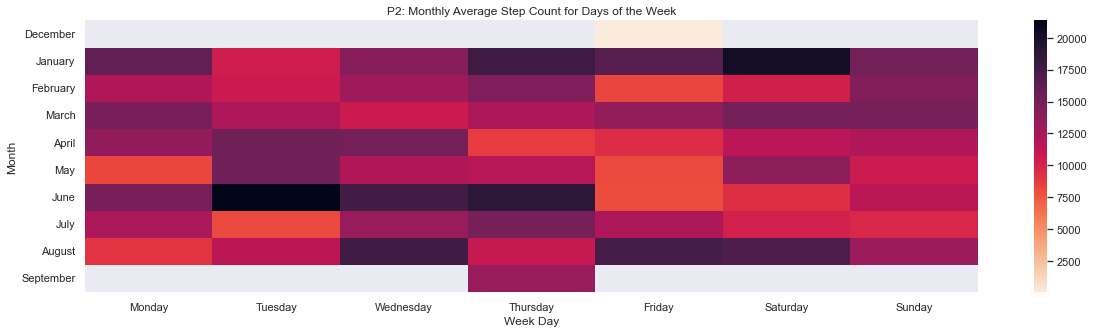

In [32]:
# first group the required data
hm2 = day2.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
hm2 = hm2.pivot("Month", "Week Day", "Steps (count)")
# now plot the data using seaborn
ax = sns.heatmap(hm2,cmap='rocket_r')
ax.set_title('P2: Monthly Average Step Count for Days of the Week')

Text(0.5, 1.0, 'P3: Monthly Average Step Count for Days of the Week')

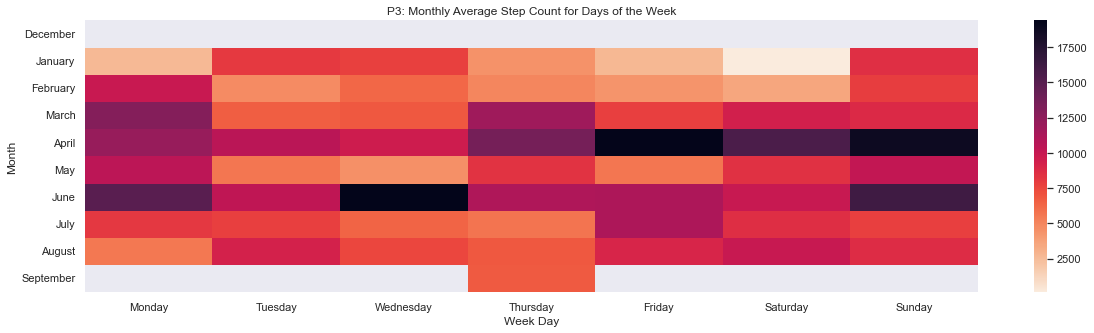

In [33]:
# first group the required data
hm3 = day5.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
hm3 = hm3.pivot("Month", "Week Day", "Steps (count)")
# now plot the data using seaborn
ax = sns.heatmap(hm3,cmap='rocket_r')
ax.set_title('P3: Monthly Average Step Count for Days of the Week')

Looking at the heatmaps for participant 2 and 3, the assumption does not apply as for P2 there is no obvious trend and for P5, the step count does not show a big difference between the months with university and those without.

So Concluding, the assumption that there will be higher step counts for week days during the semester term can not be shown as the other months such as July also show a similiar amount of steps for the week.

## Sub Question 2: Does weather conditions such as rainfall and amount of sunlight impact the number of steps made in a week?

Assumption: More rain will result in lower step counts and people are more likely to make more step when it's sunny.

### Correlation between rain and sunlight with step count for Participant 1

In [34]:
# first merge the data needed to test correlation
t = day.copy()
t = pd.merge(t,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
t2 = pd.merge(t,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
t2

,Date,Steps (count),Week Day,Month,Week,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
0,2021-12-31,0.000000,Friday,December,52,NaN,NaN
1,2022-01-01,11609.000000,Saturday,January,52,0.0,27.6
2,2022-01-02,10337.000000,Sunday,January,52,0.0,31.9
3,2022-01-03,6310.000000,Monday,January,1,0.0,31.6
4,2022-01-04,14395.000000,Tuesday,January,1,0.0,28.6
...,...,...,...,...,...,...,...
241,2022-08-29,8332.918443,Monday,August,35,0.0,11.9
242,2022-08-30,8834.000000,Tuesday,August,35,0.4,16.0
243,2022-08-31,14871.000000,Wednesday,August,35,0.0,14.7
244,2022-09-01,14604.000000,Thursday,September,35,0.2,13.3


In [35]:
# test correlation 
t2.corr()

,Steps (count),Week,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
Steps (count),1.000000,-0.039347,-0.109879,0.295710
Week,-0.039347,1.000000,-0.150440,-0.410057
Rainfall amount (millimetres),-0.109879,-0.150440,1.000000,-0.260581
Daily global solar exposure (MJ/m*m),0.295710,-0.410057,-0.260581,1.000000


From this we can see that Step count and Rainfall have weak negative correlation at -0.111435 meaning that rain isn't really a factor that impacts the step activity of participant 1, and even if there is rainfall only reduces the amount of step walked slightly.

Daily sun exposure however show a slightly higher positive correlation at 0.293880, while there still isn't a strong relationship between the two, there is some correlation between the level of sunlight and amount of steps walked. Meaning that on a sunnier day, participant 1 is could be more likely to make more steps.

In [36]:
# first merge the data needed to test correlation
t = day2.copy()
t = pd.merge(t,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
t2 = pd.merge(t,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
t2

,Date,Steps (count),Week Day,Month,Week,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
0,2021-10-08,41,Friday,NaN,52,NaN,NaN
1,2021-12-31,36,Friday,December,52,NaN,NaN
2,2022-01-01,22250,Saturday,January,52,0.0,27.6
3,2022-01-02,22390,Sunday,January,1,0.0,31.9
4,2022-01-03,8887,Monday,January,1,0.0,31.6
...,...,...,...,...,...,...,...
241,2022-08-28,17274,Sunday,August,35,3.6,16.4
242,2022-08-29,12701,Monday,August,35,0.0,11.9
243,2022-08-30,17126,Tuesday,August,35,0.4,16.0
244,2022-08-31,17405,Wednesday,August,35,0.0,14.7


In [37]:
t2.corr()

,Steps (count),Week,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
Steps (count),1.000000,-0.076168,-0.094369,0.288468
Week,-0.076168,1.000000,-0.142247,-0.471411
Rainfall amount (millimetres),-0.094369,-0.142247,1.000000,-0.262359
Daily global solar exposure (MJ/m*m),0.288468,-0.471411,-0.262359,1.000000


Participant 2 shows minimal negative correlation between rainfall and step count demonstrating that rainfall isn't a factor that impacts the amount of steps made by participant 2. Like participant 1, participant 2 show a slightly higher positive correlation to solar exposure at 0.288391, showing that on a sunnier day, participant 2 is could be more likely to make more steps.

In [38]:
# first merge the data needed to test correlation
t = day5.copy()
t = pd.merge(t,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
t2 = pd.merge(t,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
t2

,Date,Steps (count),Week Day,Month,Week,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
0,2022-01-01,114,Saturday,January,52,0.0,27.6
1,2022-01-02,8479,Sunday,January,52,0.0,31.9
2,2022-01-03,5104,Monday,January,52,0.0,31.6
3,2022-01-04,8031,Tuesday,January,1,0.0,28.6
4,2022-01-05,7743,Wednesday,January,1,3.8,16.8
...,...,...,...,...,...,...,...
217,2022-08-28,12888,Sunday,August,31,3.6,16.4
218,2022-08-29,5994,Monday,August,31,0.0,11.9
219,2022-08-30,9820,Tuesday,August,31,0.4,16.0
220,2022-08-31,10523,Wednesday,August,32,0.0,14.7


In [39]:
t2.corr()

,Steps (count),Week,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
Steps (count),1.000000,0.025117,-0.067011,-0.133802
Week,0.025117,1.000000,-0.195559,-0.178531
Rainfall amount (millimetres),-0.067011,-0.195559,1.000000,-0.294000
Daily global solar exposure (MJ/m*m),-0.133802,-0.178531,-0.294000,1.000000


Participant 3 show also negligible correlation between rainfall and step count at -0.068706 and also shows a low negative relationship with sun exposure at -0.131185, showing that sunlight also isn't a factor that impacts Participant 3's step activity.

To conclude the assumption is not true as rainfall is not a factor that will reduce the step count as it has low correlation but sunlight did show slight correlation with step count. However it could be noted by participant 3's results that this could also be impacted by personal preferance as some people may like rain or dislike sunlight and have different correlations.

### Sub Q3. Is there a pattern in inactivity during the week?

here we define Inactive  <= 30 steps/hr
with note from paper 3 as they defined an inactive day to be <=500 steps

In [48]:
p1

,Start,Finish,Steps (count),Week Day,Month,Year,Date
0,2021-12-31 23:00:00,2022-01-01 00:00:00,0.000000,Friday,December,2021,2021-12-31
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000000,Saturday,January,2022,2022-01-01
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000000,Saturday,January,2022,2022-01-01
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000000,Saturday,January,2022,2022-01-01
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000000,Saturday,January,2022,2022-01-01
...,...,...,...,...,...,...,...
5862,2022-09-02 04:00:00,2022-09-02 05:00:00,9.000000,Friday,September,2022,2022-09-02
5863,2022-09-02 05:00:00,2022-09-02 06:00:00,0.000000,Friday,September,2022,2022-09-02
5864,2022-09-02 06:00:00,2022-09-02 07:00:00,410.584935,Friday,September,2022,2022-09-02
5865,2022-09-02 07:00:00,2022-09-02 08:00:00,1153.415065,Friday,September,2022,2022-09-02


In [54]:
inact = p1.copy()
inact.loc[inact['Steps (count)'] <= 30, 'Inactive Hour'] = 1
inact.loc[inact['Steps (count)'] > 30, 'Inactive Hour'] = 0
inact = inact.groupby(['Date'], as_index=False).agg({'Steps (count)': 'sum','Inactive Hour':'sum','Week Day': 'first','Month': 'first'})
inact

,Date,Steps (count),Inactive Hour,Week Day,Month
0,2021-12-31,0.000000,1.0,Friday,December
1,2022-01-01,11609.000000,11.0,Saturday,January
2,2022-01-02,10337.000000,12.0,Sunday,January
3,2022-01-03,6310.000000,12.0,Monday,January
4,2022-01-04,14395.000000,11.0,Tuesday,January
...,...,...,...,...,...
241,2022-08-29,8332.918443,12.0,Monday,August
242,2022-08-30,8834.000000,11.0,Tuesday,August
243,2022-08-31,14871.000000,9.0,Wednesday,August
244,2022-09-01,14604.000000,6.0,Thursday,September


In [56]:
wkday = inact.groupby(['Week Day'])['Inactive Hour'].mean()

<AxesSubplot:xlabel='Week Day'>

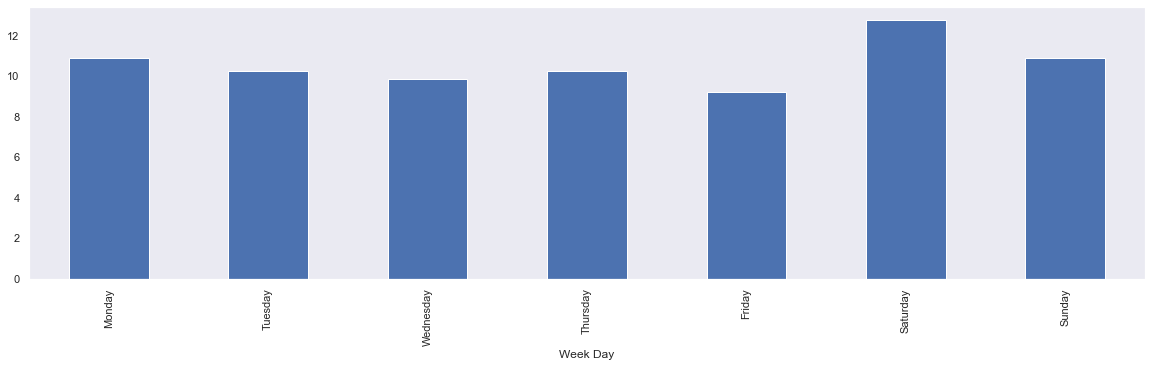

In [57]:
wkday.plot(x="Week Day", y='Inactive Hour', kind="bar")

[Text(0.5, 1.0, 'Participant 1 weekday vs weekend Inactivity trend')]

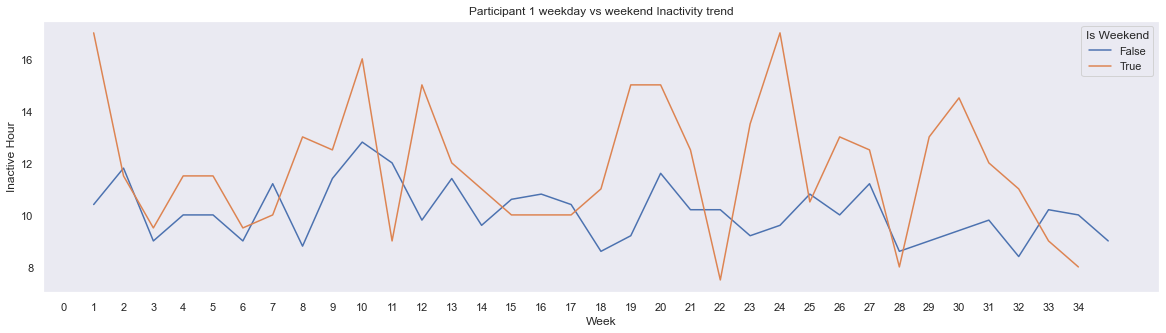

In [59]:
inact['Week'] =  inact['Date'].dt.isocalendar().week

# I wanted to drop the week 52 which is from 2021 and not 2022 but first made a copy so the data is not lost
iacopy = inact.copy()
iacopy.drop(iacopy[iacopy['Week'] == 52].index, inplace = True)


# I then separed the dates as to whether they were part of weekday or weekend
# monday = day.loc[day['Week Day'] == 'Monday']
iacopy["Is Weekend"] = iacopy['Date'].dt.dayofweek > 4


# group data, then plot as a line graph 
pt = iacopy.groupby(['Is Weekend','Week']).agg({'Inactive Hour': 'mean'}).reset_index()
g = sns.lineplot(data=pt, x="Week", y="Inactive Hour", hue="Is Weekend")
# make the x ticks show all values instead of being spaced out by 5 which was the default setting
g.set_xticks(range(35))
g.set(title='Participant 1 weekday vs weekend Inactivity trend')


# References
We report here relevant references:
1. Folkstalk.com. (2022). Retrieved 19 October 2022, from https://www.folkstalk.com/2022/09/showing-multiple-tables-from-the-same-input-box-jupyter-with-code-examples.html.
2. Small multiple time series — seaborn 0.12.1 documentation. Seaborn.pydata.org. (2022). Retrieved 19 October 2022, from https://seaborn.pydata.org/examples/timeseries_facets.html.